In [2]:
import spacy
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import re
from collections import Counter
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from analysis_code.analyze_corpus import *

In [3]:
directory = '/home/luluvyd/corpus/aclImdb/sample/'
filename = '/home/luluvyd/corpus/aclImdb/test/example_pos/0_10.txt'
nlp = spacy.load('en_core_web_md')

In [1]:
parsed_text = 'Dustin will lay down his book. Jason became a business major. Lisa is in love with Jason. \
Tanya could learn to fly helicopters. Tanya could learn to fly helicopters. Jana is moving to a new house. \
Dustin did eat his vegetables!'
doc = nlp(parsed_text)
action, linking, helping, helpingMain = analyzeVerbs(doc)
print('action verbs : ' + str(action))
print('linking verbs : ' + str(linking))
print('helping verbs : ' + str(helping))
print('helpingVB verbs : ' + str(helpingMain))


NameError: name 'nlp' is not defined

i : 0
[looks, assassinate, wait, turns, be, famed, taking, are, trained, take, is, makes, will, put, gets, implicated, has, run, doing, are, featured, aging, aging, has, been, took, has, suffered, preferring, share, becomes, hunting, relying, outwit, turned, be, watch, boils, get, relegated, are, looking, seem, have, lept, had, could, have, resembled, alas, had, do, know, 're, is, get, seemed, shake, has, tells, cover, 's, face, including, following, 's, keep, entertained, ending, has, fly]
i : 1
[is, come, are, 's, move, 's, can, guess, is, laid, verges, is, 's, are, is, ensuing, are, are, toned, is, will, find, swallow, deserve, be, satisfying]
i : 2
[came, 've, been, raised, were, had, made, meant, was, was, track, listening, got, see, get, 's, 's, see, compare, believe, took, doing, guess, do, compromise, doing, sing, 'm, did, track, is, has]


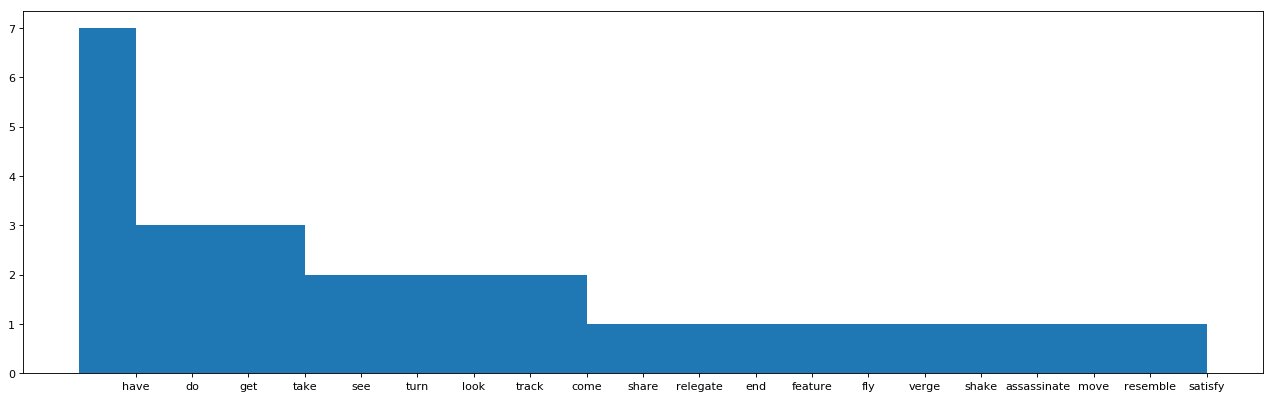

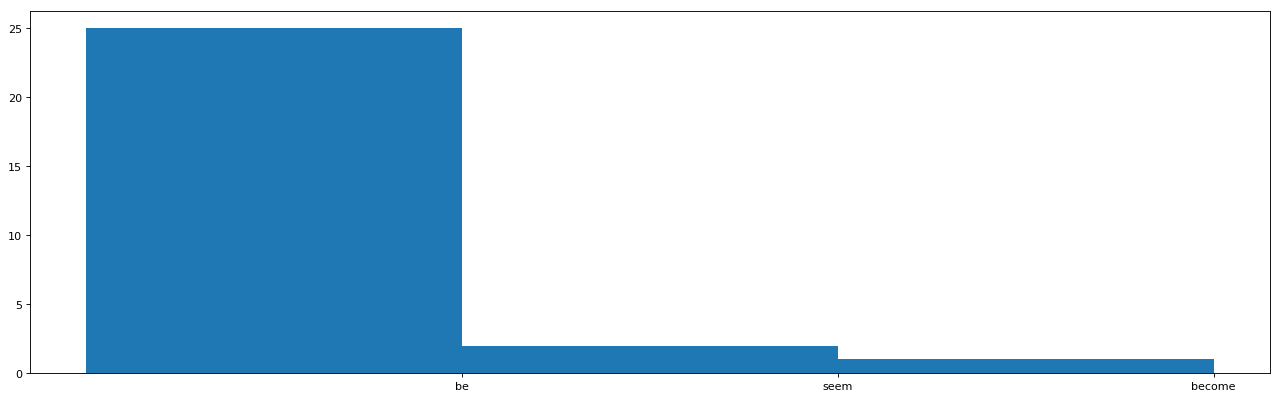

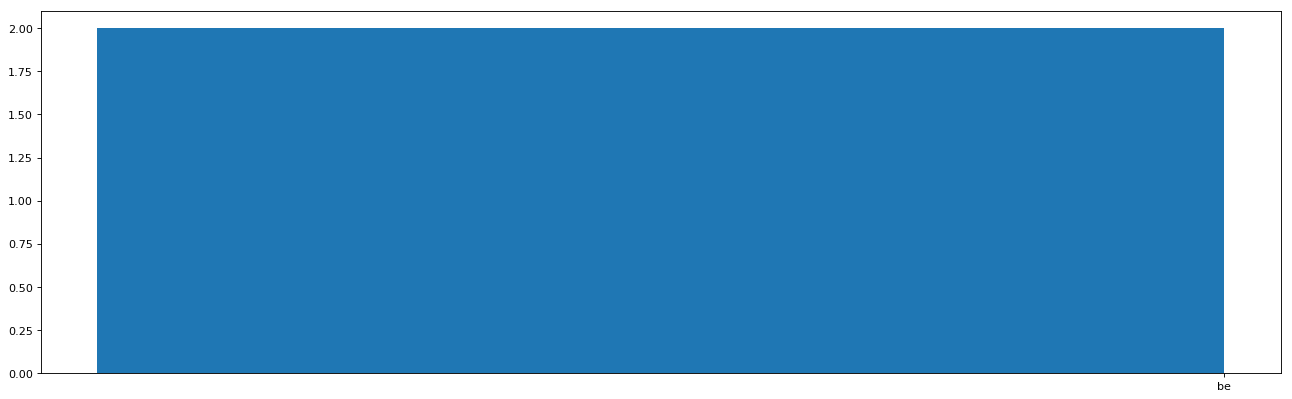

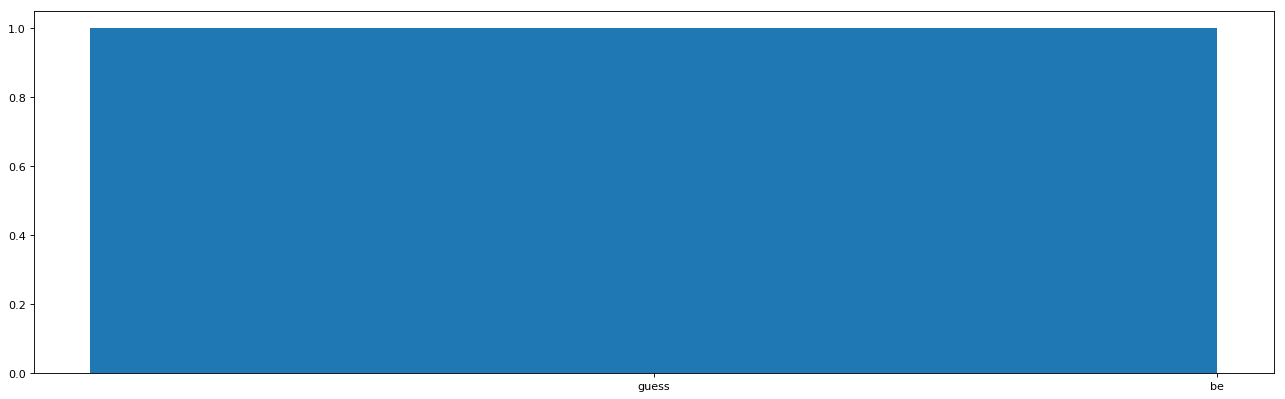

In [36]:
'''
Linking, action verbs
'''
read_files = glob.glob(directory + '*.txt')
counterAct = Counter()
counterLnk = Counter()
counterHelp = Counter()
helpingMain = Counter()
i = 0

def rankCounter(counter): 
    '''
    parameter : counter of an article by a single author
    '''
    if len(counter) == 0:
        return None, None
    else:
        c = counter.most_common(20)
        return zip(*c)

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        a, b, c, d = analyzeVerbs(doc) 
        counterAct += a 
        counterLnk += b 
        counterHelp += c 
        helpingMain += d 
        i += 1
        
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterAct)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterLnk)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterHelp)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(helpingMain)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()